Shiva Pal

Teammate: Brian Cheung

# Lab 1 Part 2:

# Task 4: Replicate the 5 flu charts

In [33]:
# Libraries
library(reshape2)
library(ggplot2)
library("dplyr")
library("ggmap")
library("maptools")
library(maps)
library(viridis)
library(ggplot2)
library(mapdata)
library(fiftystater)

Chart #1: 
Influenza National Summary 

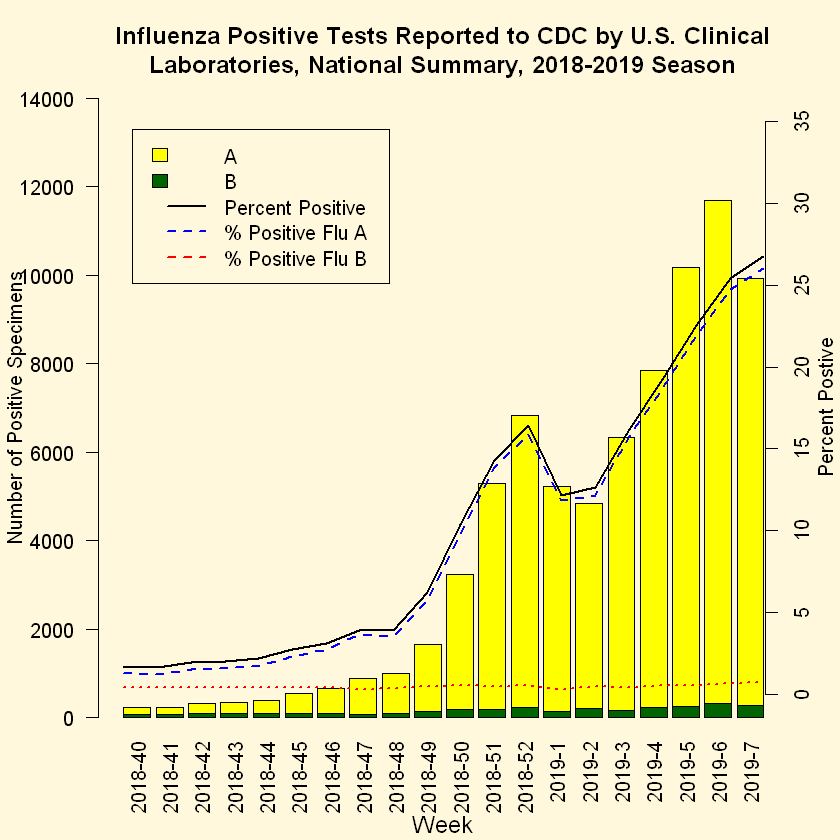

In [34]:
# Read the clinical lab data for 2018 - 2019
clinical <- read.csv("Files/WHO_NREVSS_Clinical_Labs.csv", skip = 1)
par(bg='cornsilk' )
# Plot Total number of A
barplot(clinical$TOTAL.A,
        names.arg = paste(clinical$YEAR, clinical$WEEK,sep="-"), 
        ylim = c(0,14000), col='yellow', 
        las = 2,
        ylab="Number of Positive Specimens")
title(xlab="Week", line=4, cex.lab=1.2)
# Plot total B
par(new = T)
barplot(clinical$TOTAL.B, ylim = c(0,14000), col='darkgreen', las = 2)

par(new = T)
#Plot Percent Positive line
plot(clinical$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 35), axes = F, ann = F)

# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )
# Plot line graph
lines(clinical$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(clinical$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)

title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018-2019 Season")
legend("topleft", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA), lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))

Chart #2: Positive Tested

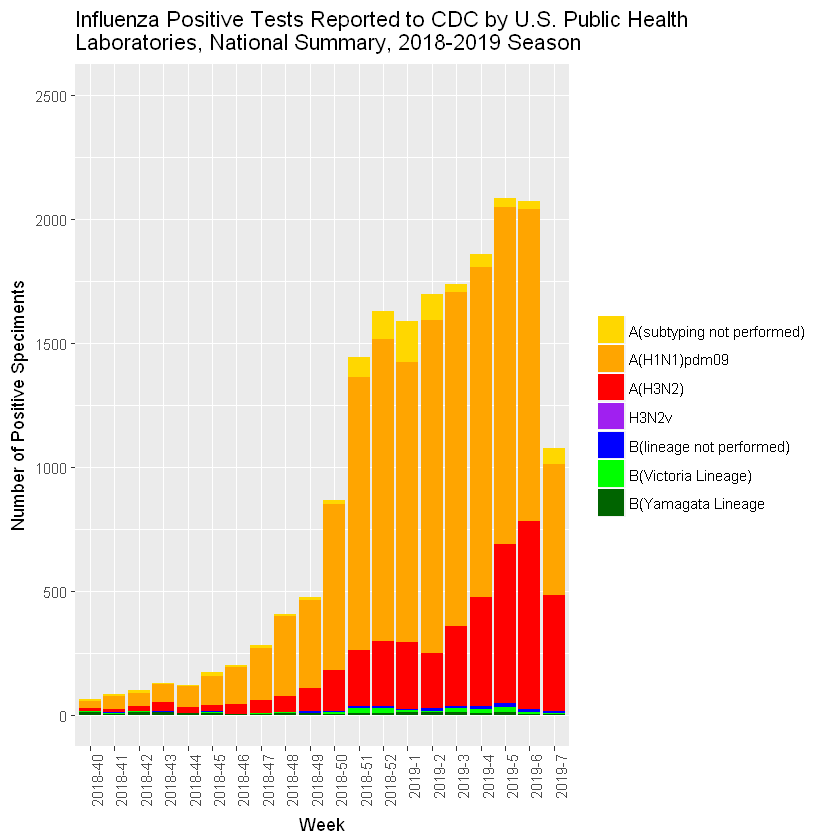

In [35]:
# Read the data from public health labs
publicHealth <- read.csv("Files/WHO_NREVSS_Public_Health_Labs.csv")

# Set data as a dataframe
data <- data.frame(
    A.Substring = publicHealth$A..Subtyping.not.Performed, 
    A.2009 = publicHealth$A..2009.H1N1,
    A.H3 = publicHealth$A..H3, 
    H3N2v = publicHealth$H3N2v, 
    B = publicHealth$B,
    BVic = publicHealth$BVic, 
    B.Yam = publicHealth$BYam,
    # Combine year and week
    Week = paste(publicHealth$YEAR, publicHealth$WEEK,sep="-")
)
# Melt into two columns
mdata <- melt(data, id.vars = "Week") 
# Legend
legendLabel = c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)", "H3N2v",
                "B(lineage not performed)", "B(Victoria Lineage)", "B(Yamagata Lineage")

color = c("gold","orange", "red", "purple", "blue", "green", "darkgreen")
# plot using ggplot
p <- ggplot(mdata, aes(x = Week, y = value, fill = variable)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2018-2019 Season", 
    y = "Number of Positive Speciments") +
    scale_fill_manual(labels = legendLabel, values = color) +
    geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    scale_y_continuous(limits = c(0,2500)) + 
    guides (fill = guide_legend(title = "")) 
p

Chart #3: Pediatric Death

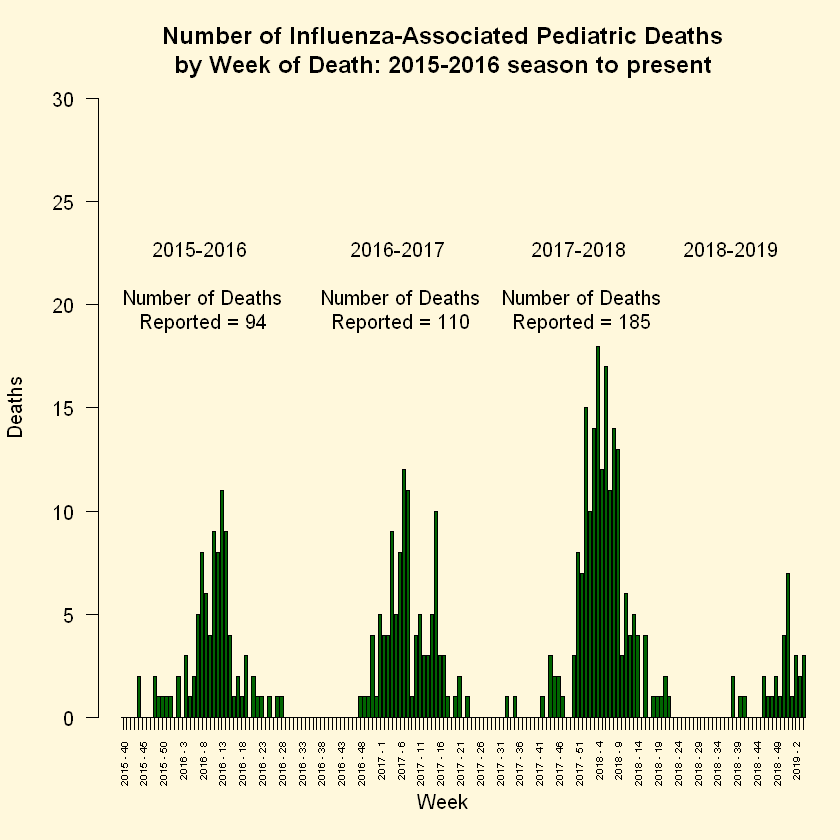

In [36]:
pedDeathsRaw <- read.csv("Files/Weekly.csv") #read in csv data
pedDeathsMod <- pedDeathsRaw[c(1:173),c(2:3)] #keep relevant fields
par(bg="cornsilk") #set background
#format x labels
pedDeathX <- c()
year <- 2015
week <- 40
for(i in 1:173) {
  if((i-1)%%5==0){
    pedDeathX[i] <- paste(year,"-",week)
  } else {
    pedDeathX[i] <- ""
  }
  
  week <- week+1
  if(week > 52){
    week <- week%%52
    year <- year+1
  }
}
lab <- rep("", length(pedDeathsMod$WEEK.NUMBER))
lab <- pedDeathX

barplot(pedDeathsMod$NO..OF.DEATHS,names.arg = lab,
        cex.names=.5, beside=T, 
        main = "Number of Influenza-Associated Pediatric Deaths\nby Week of Death: 2015-2016 season to present", xlab = "Week",
        ylab = "Deaths", ylim=c(0,30), xlim= c(1,195), axis.lty=1, las=2, col="darkgreen")
#axis(side = 1,
#     labels=lab,
#     at=c(1:173),
#     las=2,
#     tck=-.025)
text(25,21, labels="2015-2016 \n\nNumber of Deaths\nReported = 94")
text(85,21, labels="2016-2017 \n\nNumber of Deaths\nReported = 110")
text(140,21, labels="2017-2018 \n\nNumber of Deaths\nReported = 185")
text(185,22.75, labels="2018-2019")

Chart #4: Influenza Sub-type pie-charts

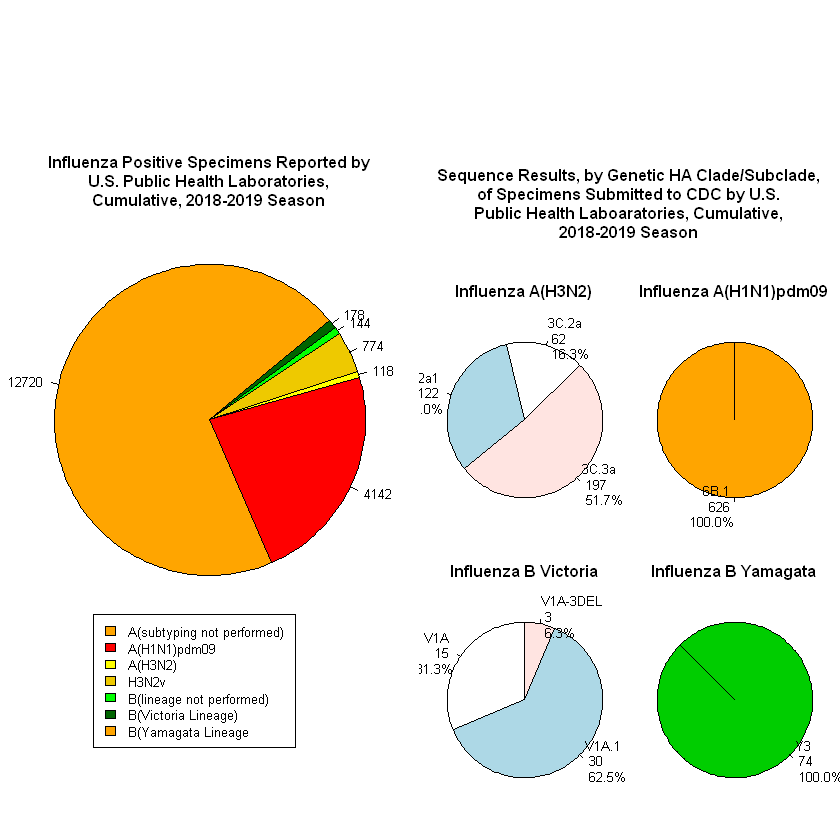

In [37]:
subTypeRaw <- read.csv("Files/Genetic07.csv") #read csv data
# Sum together all the values
AH1N1 <-sum(publicHealth$A..2009.H1N1)
AH3N2 <-sum(publicHealth$A..H3)
ASub <-sum(publicHealth$A..Subtyping.not.Performed)
BVic <- sum(publicHealth$BVic)
BYam <- sum(publicHealth$BYam)
B <- sum(publicHealth$B)
# Place sum into a list
p <-  c(AH1N1, AH3N2, B, ASub, BVic, BYam)

#extract relevant data
H3 <- subTypeRaw[c(6:8),]
H1 <- subTypeRaw[c(5),]
Victoria <- subTypeRaw[c(1:3),]
Yamagata <- subTypeRaw[c(4),]
#generate labels
H3Lab <- paste(H3$Sequence.Genetic.Group,"\n",H3$Distinct.count.of.Cdc.Id..,"\n",H3$X..of.Total.Distinct.count.of.Cdc.Id..)
H1Lab <- paste(H1$Sequence.Genetic.Group,"\n",H1$Distinct.count.of.Cdc.Id..,"\n",H1$X..of.Total.Distinct.count.of.Cdc.Id..)
VictoriaLab <- paste(Victoria$Sequence.Genetic.Group,"\n",Victoria$Distinct.count.of.Cdc.Id..,"\n",Victoria$X..of.Total.Distinct.count.of.Cdc.Id..)
YamagataLab <- paste(Yamagata$Sequence.Genetic.Group,"\n",Yamagata$Distinct.count.of.Cdc.Id..,"\n",Yamagata$X..of.Total.Distinct.count.of.Cdc.Id..)
#format graphics into matrix
par(mai=rep(0, 4))
layout(matrix(c(1,1,2,2,1,1,3,4,1,1,5,6), ncol = 4, byrow = TRUE))
# Main Pie Graph
pie(p, labels = p, col = c("orange", "red","yellow","gold2", "green","darkgreen"),
    radius= 0.8, init.angle = 40)
title("Influenza Positive Specimens Reported by\nU.S. Public Health Laboratories,\nCumulative, 2018-2019 Season", line = -13)
legend(-0.6,-1,legendLabel, fill = c("orange", "red","yellow","gold2", "green","darkgreen")) 
# 4 side pie graph
plot.new()
title("Sequence Results, by Genetic HA Clade/Subclade,\nof Specimens Submitted to CDC by U.S.\nPublic Health Laboaratories, Cumulative,\n2018-2019 Season", line = -15)
pie(H3$Distinct.count.of.Cdc.Id.., labels=H3Lab, main ="\nInfluenza A(H3N2)", init.angle = 45)
pie(H1$Distinct.count.of.Cdc.Id.., labels=H1Lab, col='orange', main ="\nInfluenza A(H1N1)pdm09", init.angle = 90)
pie(Victoria$Distinct.count.of.Cdc.Id.., labels=VictoriaLab,  main ="\nInfluenza B Victoria", init.angle= 90)
pie(Yamagata$Distinct.count.of.Cdc.Id.., labels=YamagataLab, col='green3',  main ="\nInfluenza B Yamagata", init.angle = 135)

Chart #5: HeatMap

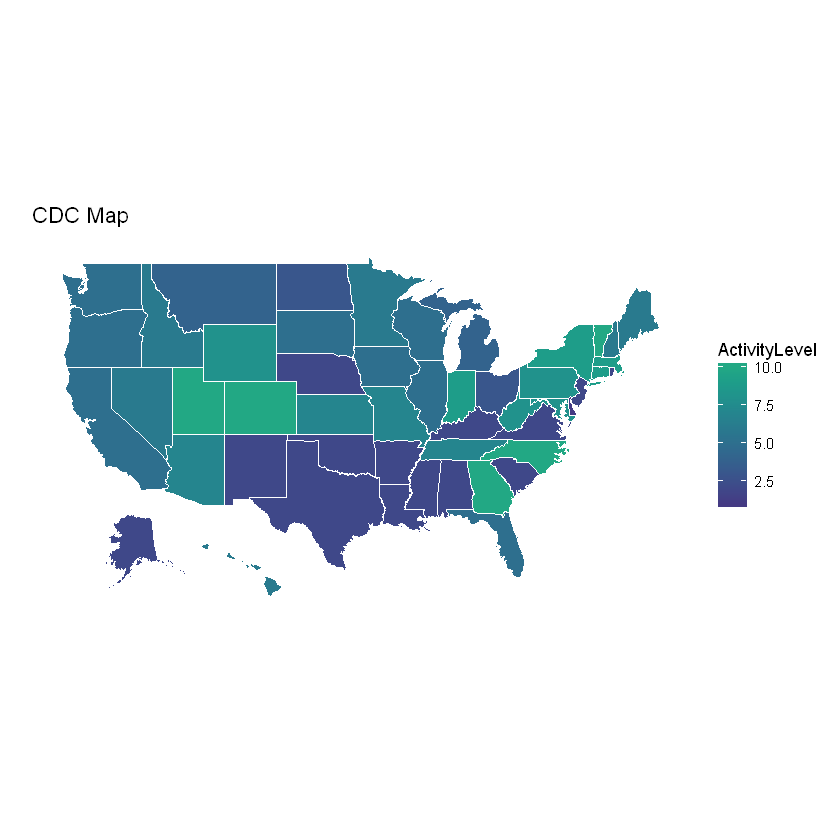

In [38]:
USData <- read.csv("Files/StateDatabyWeekforMap_2018-19week40-4.csv")
stateData <- USData[c(865:917),c(1,4)] #extract relevant data
#create data frame
data <- data.frame(ActivityLevel = as.numeric(stateData$ACTIVITY.LEVEL), region = tolower(stateData$STATENAME))
# Get state data from API
usa <- fifty_states$id
# Plot the data and match with coords
gg <- ggplot() + geom_map(data = data, map = fifty_states, 
                    aes(fill=ActivityLevel, map_id = region), 
                    color = 'white', size = 0.5) +
        expand_limits(x = fifty_states$long, y = fifty_states$lat) + coord_map() 
# Adjust legend and scaling
gg <- gg + scale_fill_viridis(name = "ActivityLevel",
                              begin = 0.17, end =0.6)
# CDC Map
gg <- gg + ggtitle("CDC Map")
gg <- gg + scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(panel.background = element_blank())
gg

# Task 5: Flu Pattern For Entire Year

Chart #1: Influenza National Summary for 2018

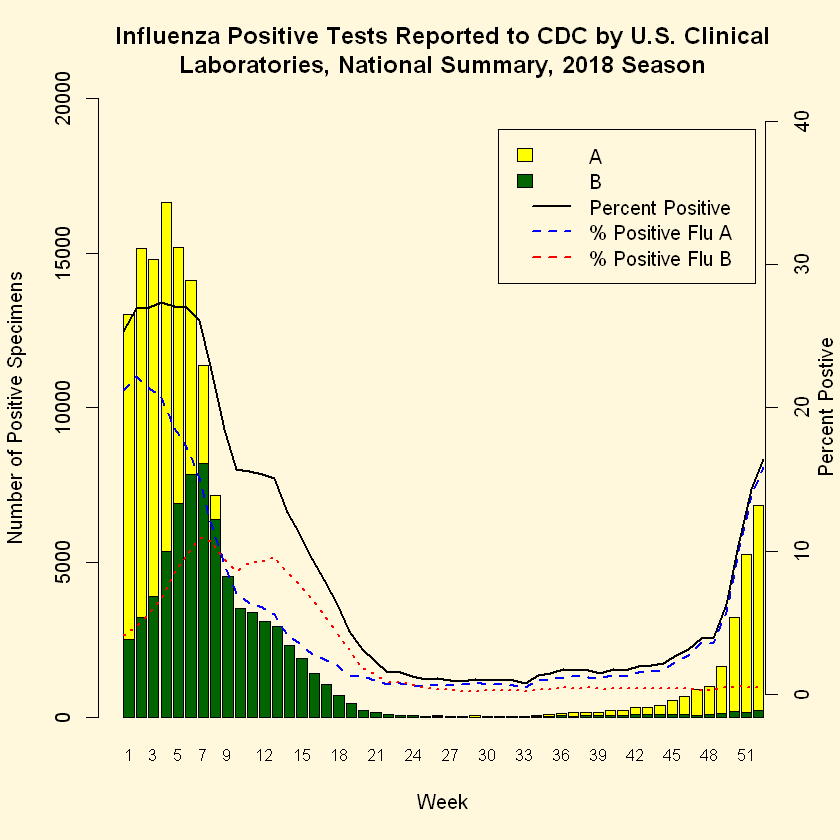

In [39]:
# Read csv file and selecting Week 1 from 2018 to week 52
ClinicalfluPattern <- read.csv("Files/WHO_NREVSS_Clinical_Labs_2017-2019.csv")
ClinicalfluPattern <- ClinicalfluPattern[c(14:65),]

par(bg='cornsilk' )

barplot(ClinicalfluPattern$TOTAL.A, names.arg = ClinicalfluPattern$WEEK, 
        cex.names = 0.8,
        ylim = c(0,20000), col='yellow', xlab="Week", ylab="Number of Positive Specimens", )
par(new = T)
barplot(ClinicalfluPattern$TOTAL.B, ylim = c(0,20000), col='darkgreen')

par(new = T)
#Plot Percent Positive line

plot(ClinicalfluPattern$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 40), axes = F, ann = F)
# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )

#Plot line graph
lines(ClinicalfluPattern$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(ClinicalfluPattern$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)
title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018 Season")
legend("topright", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), 
       col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA), 
       lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))


Chart #2: Positive Tested 2018 Chart

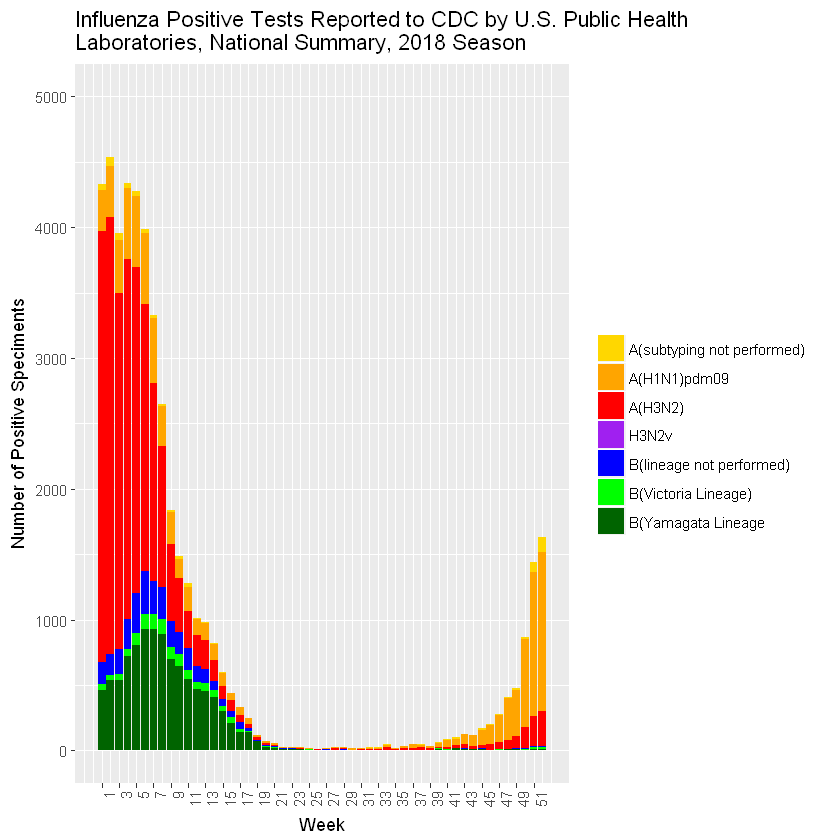

In [40]:
# Read the csv file and only select week from 2018
publicHealthFluPattern <- read.csv("Files/WHO_NREVSS_Public_Health_Labs_2017-2019.csv")
publicHealthFluPattern <- publicHealthFluPattern[c(14:65),]
# Place data into a datafram
data2 <- data.frame(
    A.Substring = publicHealthFluPattern$A..Subtyping.not.Performed., 
    A.2009 = publicHealthFluPattern$A..2009.H1N1.,
    A.H3 = publicHealthFluPattern$A..H3., 
    H3N2v = publicHealthFluPattern$H3N2v, 
    B = publicHealthFluPattern$B,
    BVic = publicHealthFluPattern$BVic, 
    B.Yam = publicHealthFluPattern$BYam,
  row.names = publicHealthFluPattern$WEEK
)
# Genereate week number to list
data2$Week <- c(1:52)
# Melt the data into 2 columns
mdata2 <- melt(data2, id.vars = "Week")
# Legend
legendLabel = c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)", "H3N2v",
                "B(lineage not performed)", "B(Victoria Lineage)", "B(Yamagata Lineage")
color = c("gold","orange", "red", "purple", "blue", "green", "darkgreen")

positiveTest2018 <- ggplot(mdata2, aes(x = mdata2$Week, y = value, fill = variable)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2018 Season", 
    y = "Number of Positive Speciments", x = "Week") + 
    scale_fill_manual(labels = legendLabel, values = color) +
    geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_y_continuous(limits = c(0,5000)) + 
    # plot x axis, with breaks
    scale_x_continuous(breaks = seq(1,52,2)) +
    guides (fill = guide_legend(title = "")) 
positiveTest2018

# Task 6: Flu Pattern for New York State 

Chart #1: Influenza New York Summary

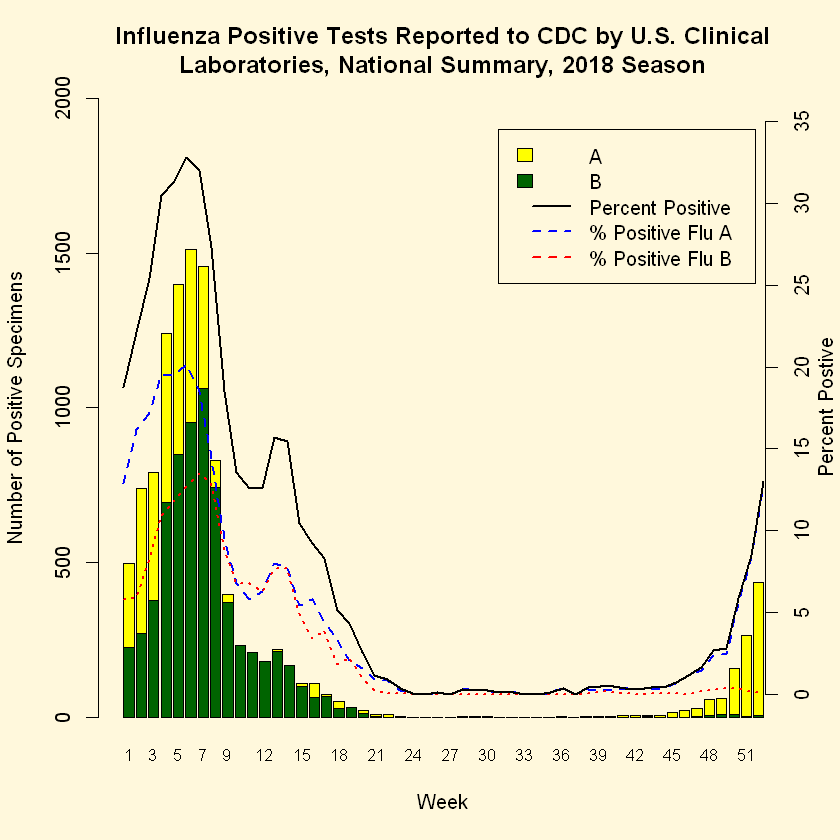

In [41]:
# Read csv for New York in 2018
newYorkClinical <- read.csv("Files/WHO_NREVSS_NewYork_Clinical_Labs.csv", skip =1)
newYorkClinical <- newYorkClinical[c(14:65),]

par(bg='cornsilk' )

barplot(newYorkClinical$TOTAL.A, names.arg = newYorkClinical$WEEK, 
        cex.names = 0.8,
        ylim = c(0,2000), col='yellow', xlab="Week", ylab="Number of Positive Specimens", )
par(new = T)
barplot(newYorkClinical$TOTAL.B, ylim = c(0,2000), col='darkgreen')

par(new = T)
#Plot Percent Positive line

plot(newYorkClinical$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 35), axes = F, ann = F)
# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )
# Plot the line graph
lines(newYorkClinical$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(newYorkClinical$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)
title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018 Season")
legend("topright", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"),
       col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA),
       lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))